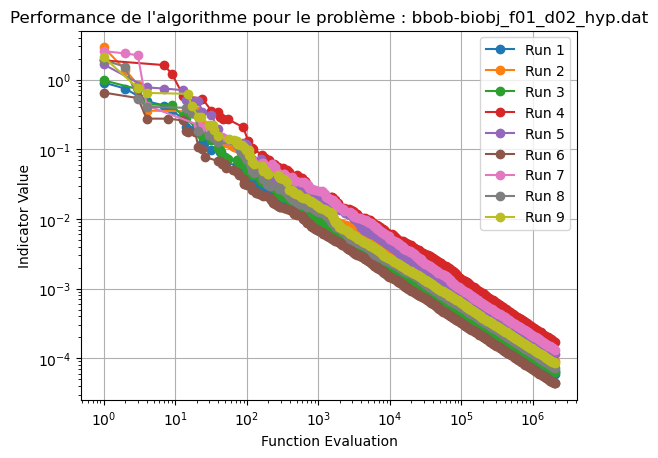

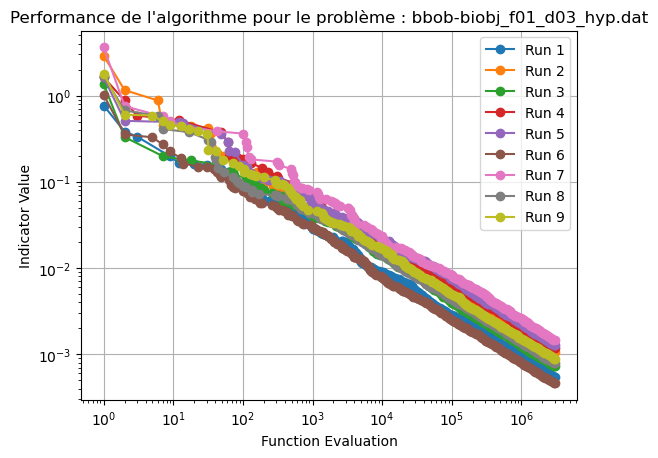

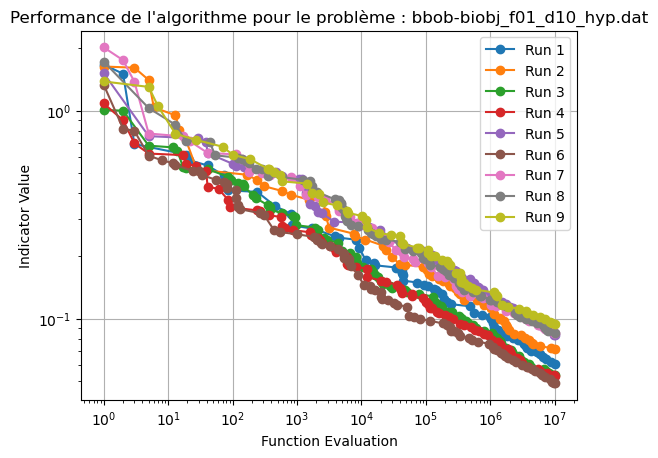

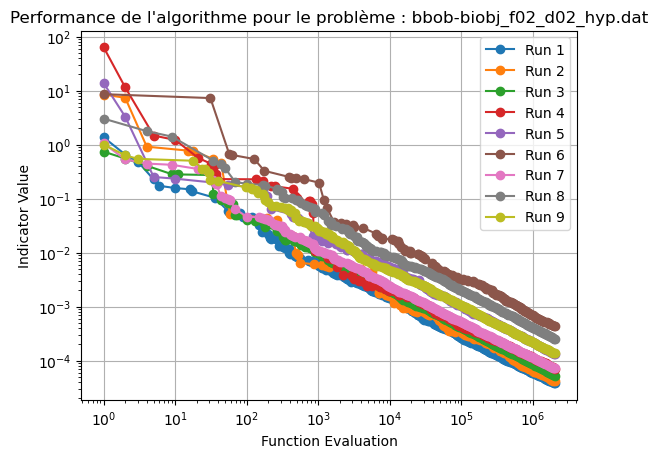

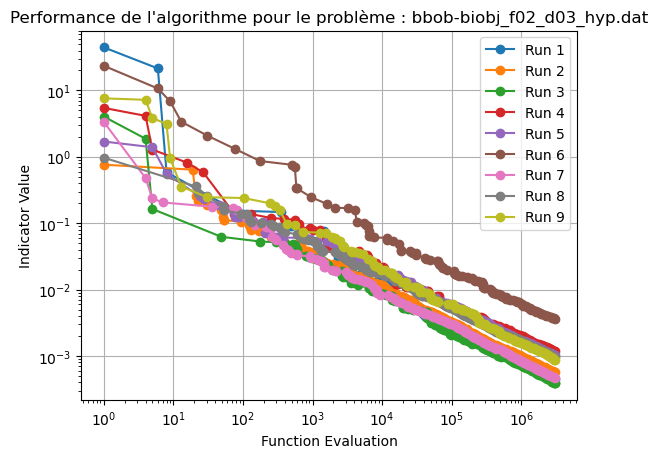

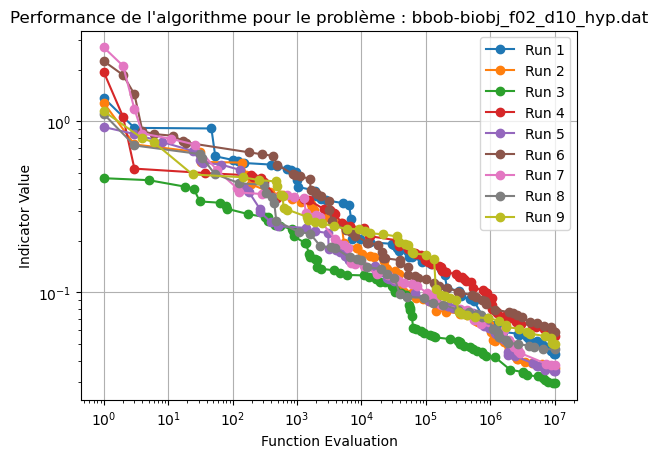

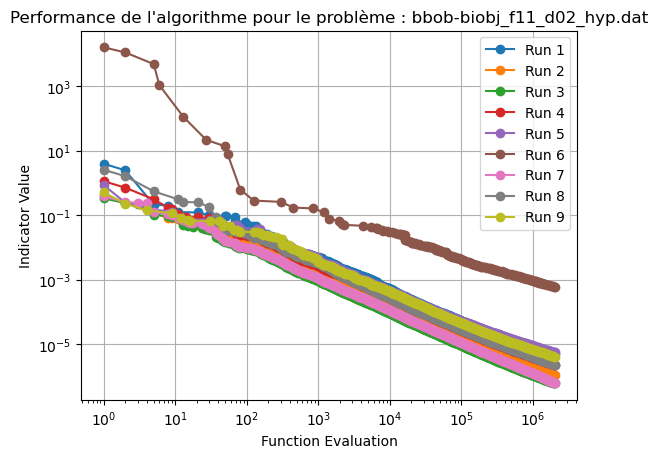

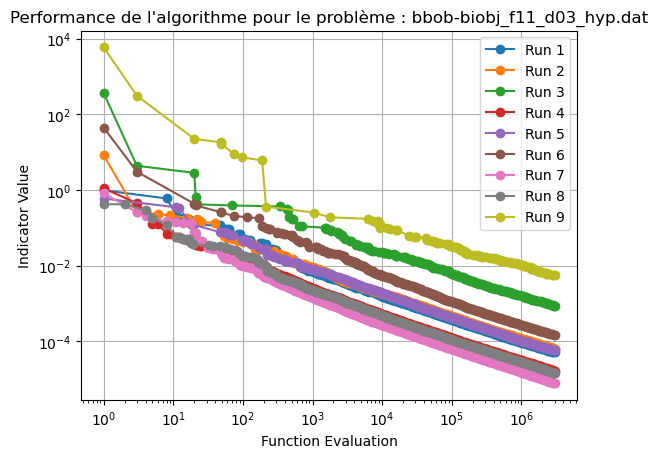

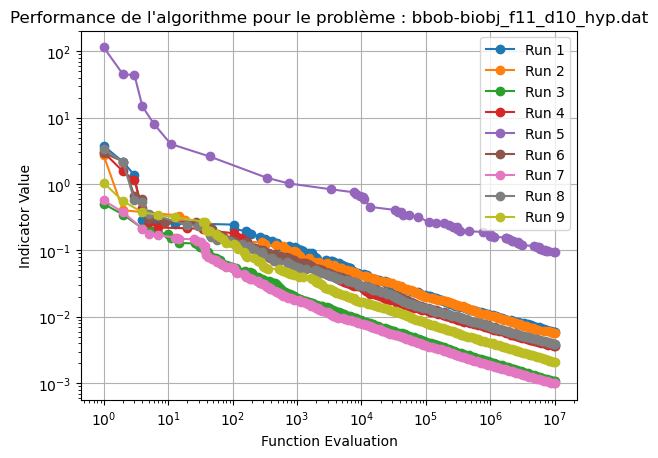

In [1]:
# DEUXIEME ETAPE 
#1 
import numpy as np
import os
import matplotlib.pyplot as plt

# Répertoire contenant les fichiers .dat pour chaque problème
directory = 'data/d02_d03_d10/1-separable_1-separable/'

# Initialisation des listes pour stocker les résultats pour chaque problème
all_problems_data = []

# Parcourir tous les fichiers dans le répertoire
for filename in os.listdir(directory):
    if filename.endswith('.dat'):
        filepath = os.path.join(directory, filename)
        
        # Initialisation des listes pour stocker les données de chaque run/instance pour un problème
        function_evaluation = []
        indicator_value = []
        
        # Lire les données brutes à partir du fichier .dat
        with open(filepath, 'r') as file:
            lines = file.readlines()

        inst_run_fct = []
        inst_run_valu = []
        
        # Analyse des données pour chaque run/instance
        for line in lines:
            if line.startswith('%') or line.strip() == '':
                if inst_run_fct:
                    function_evaluation.append(inst_run_fct)
                    indicator_value.append(inst_run_valu)
                inst_run_fct = []
                inst_run_valu = []
                continue
            else:
                data = line.split()
                inst_run_fct.append(float(data[0]))
                inst_run_valu.append(float(data[1]))

        # Stocker les résultats pour ce problème
        problem_data = {
            'filename': filename,
            'function_evaluation': function_evaluation,
            'indicator_value': indicator_value
        }
        all_problems_data.append(problem_data)

# Analyse et visualisation des données pour chaque problème
for problem_data in all_problems_data:
    filename = problem_data['filename']
    function_evaluation = problem_data['function_evaluation']
    indicator_value = problem_data['indicator_value']
    
    # Calcul des statistiques pour chaque run/instance
    for i in range(len(function_evaluation)):
        fe = np.array(function_evaluation[i])
        iv = np.array(indicator_value[i])
        mean_fe = np.mean(fe)
        mean_iv = np.mean(iv)
        median_fe = np.median(fe)
        median_iv = np.median(iv)
        var_fe = np.var(fe)
        var_iv = np.var(iv)
        


    # Visualisation des données pour chaque problème
    fig, ax = plt.subplots()
    for i in range(len(function_evaluation)):
        ax.plot(function_evaluation[i], indicator_value[i], marker='o', linestyle='-', label=f'Run {i+1}')

    ax.set_xlabel('Function Evaluation')
    ax.set_ylabel('Indicator Value')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'Performance de l\'algorithme pour le problème : {filename}')
    ax.grid(True)
    ax.legend()
    plt.show()
